<a href="https://colab.research.google.com/github/Aarya718/Codsoft-projects/blob/main/SalesPredictionUsingPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-4 : SALES PREDICTION USING PYTHON

Name: Aarya Ramchandra Tarphe

Batch: February

Domain: Data Science

Aim: Build a model that predicts the sales using simple linear regression a machine learning algorithm.

# IMPORTING PYTHON LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOADING DATASET

In [2]:
advertising = pd.read_csv('/content/advertising.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# DATA CLEANING AND ANALYSIS

In [3]:
advertising.shape

(200, 4)

In [10]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [11]:
advertising['TV'].nunique()

190

In [12]:
advertising['TV'].value_counts()

,count
TV,
199.8,2
109.8,2
17.2,2
177.0,2
222.4,2
...,...
139.3,1
216.8,1
199.1,1


In [13]:
advertising.isnull().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [14]:
advertising.dropna(inplace=True)

In [15]:
advertising.dropna(axis=1, inplace=True)

In [16]:
advertising.fillna(advertising.mean(), inplace=True)

In [17]:
advertising.fillna(advertising.median(), inplace=True)

In [18]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
advertising.duplicated().sum()

0

In [20]:
advertising.drop_duplicates(inplace=True)

# FEATURE ENGINEERING

In [21]:
advertising['Sales'] = advertising['Sales'].astype(int)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
advertising[['TV', 'Radio', 'Newspaper', 'Sales']] = scaler.fit_transform(advertising[['TV', 'Radio', 'Newspaper', 'Sales']])

In [23]:
advertising['Sales'] = np.log1p(advertising['Sales'])

# DATA VISUALIZATION

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


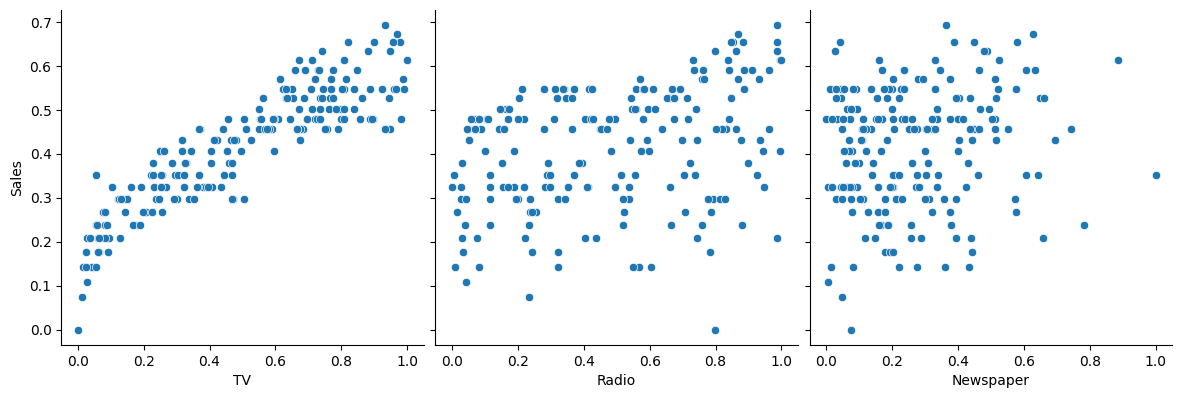

In [24]:
sns.pairplot(advertising,x_vars=['TV','Radio','Newspaper'],
             y_vars='Sales', size=4,aspect=1,kind='scatter')
plt.show()

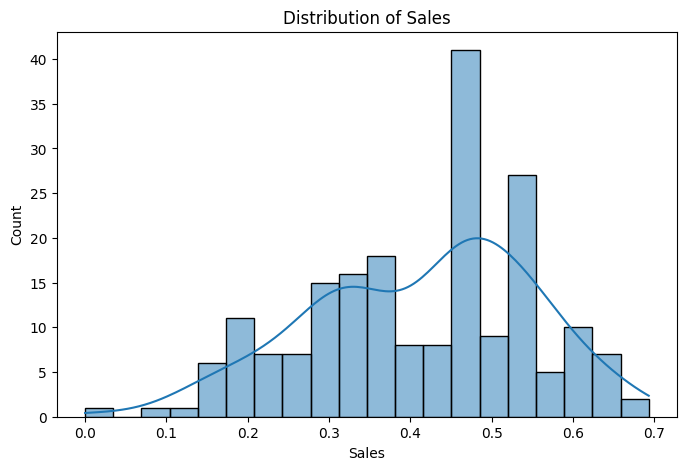

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(advertising['Sales'], bins=20, kde=True)
plt.title('Distribution of Sales')
plt.show()

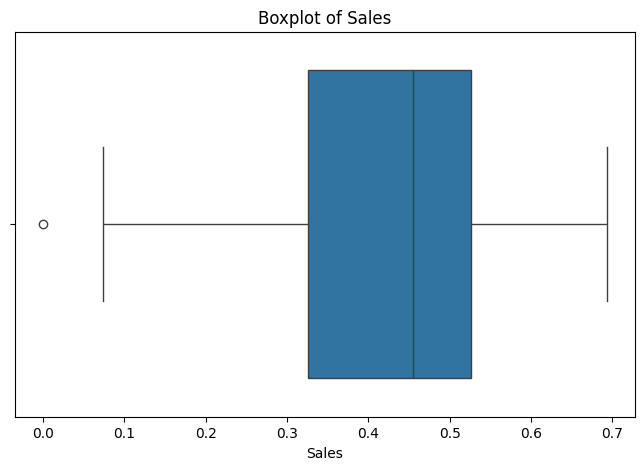

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=advertising['Sales'])
plt.title('Boxplot of Sales')
plt.show()

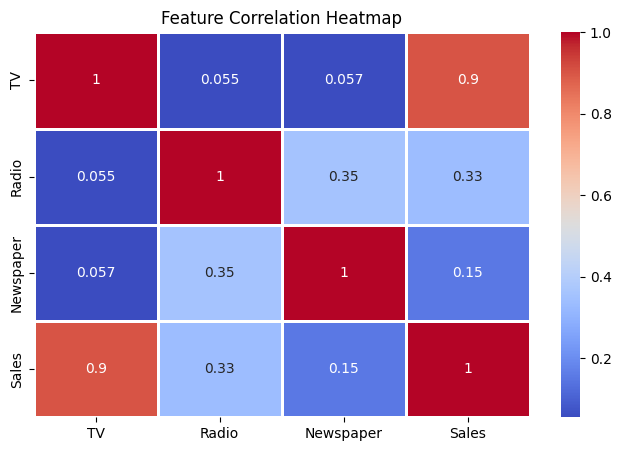

In [27]:
plt.figure(figsize=(8, 5))
sns.heatmap(advertising.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.show()

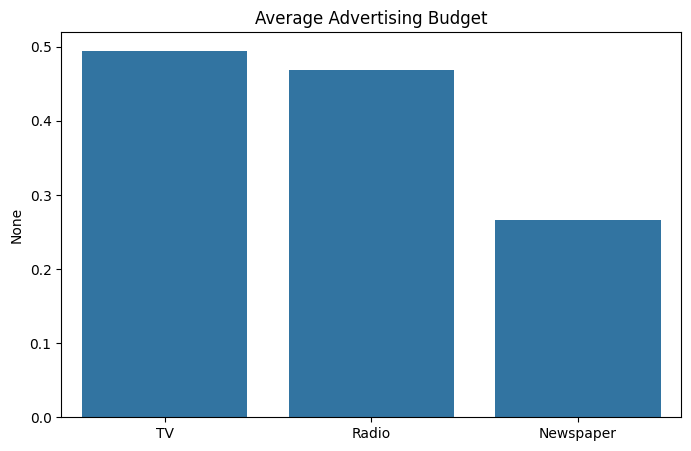

In [28]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['TV', 'Radio', 'Newspaper'], y=advertising[['TV', 'Radio', 'Newspaper']].mean())
plt.title('Average Advertising Budget')
plt.show()

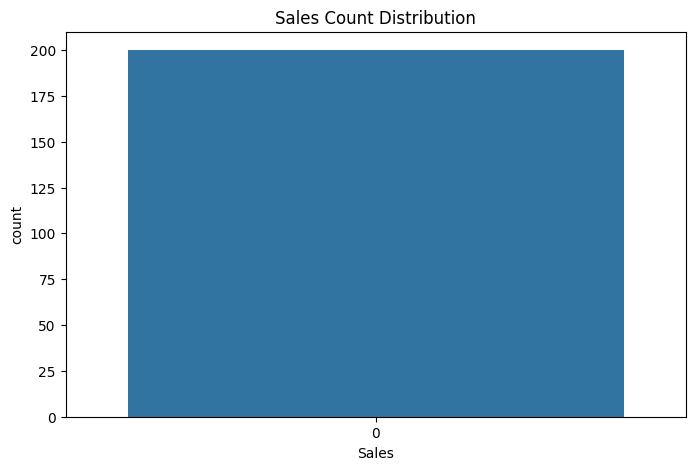

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x=advertising['Sales'].astype(int))
plt.title('Sales Count Distribution')
plt.show()

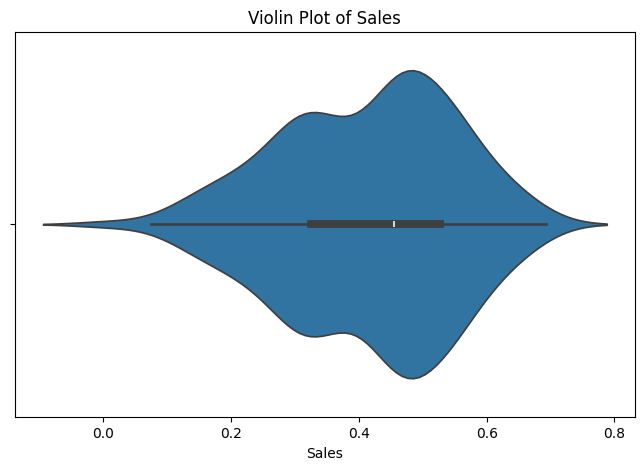

In [30]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=advertising['Sales'])
plt.title('Violin Plot of Sales')
plt.show()

# MODEL BUILDING ,TRAINING & TESTING

In [31]:
X = advertising['TV']
y = advertising['Sales']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size=0.3,random_state=100)

In [33]:
X_train

,TV
74,0.719310
3,0.509976
185,0.690903
26,0.480893
90,0.451809
...,...
87,0.371999
103,0.633074
67,0.468718
24,0.208319


In [34]:
y_train

,Sales
74,0.479573
3,0.455476
185,0.592051
26,0.430783
90,0.405465
...,...
87,0.455476
103,0.526093
67,0.379490
24,0.268264


In [35]:
import statsmodels.api as sm

In [36]:
X_train_sm = sm.add_constant(X_train)

In [37]:
lr = sm.OLS(y_train,X_train_sm).fit()
lr.params

,0
const,0.201814
TV,0.416428


In [38]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     606.5
Date:                Wed, 05 Feb 2025   Prob (F-statistic):           2.34e-52
Time:                        07:13:08   Log-Likelihood:                 190.27
No. Observations:                 140   AIC:                            -376.5
Df Residuals:                     138   BIC:                            -370.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2018      0.010     20.317      0.000       0.182       0.221
TV             0.4164      0.017     24.627      0.000       0.383       0.450
==============================================================================
Omnibus:                        1.963   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.794
Skew:                          -0.277   Prob(JB):                        0.408
Kurtosis:                       2.984   Cond. No.                         4.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

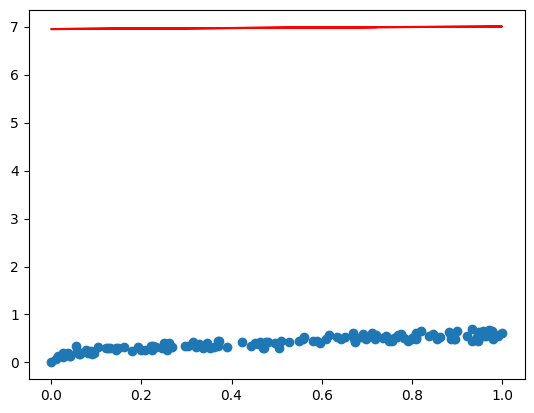

In [39]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

In [40]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-41-ab9c9584c5de>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res,bins=15)


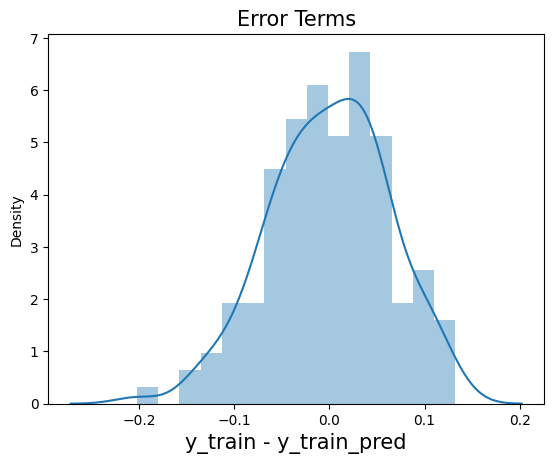

In [41]:
fig = plt.figure()
sns.distplot(res,bins=15)
plt.title('Error Terms',fontsize=15)
plt.xlabel('y_train - y_train_pred',fontsize=15)
plt.show()

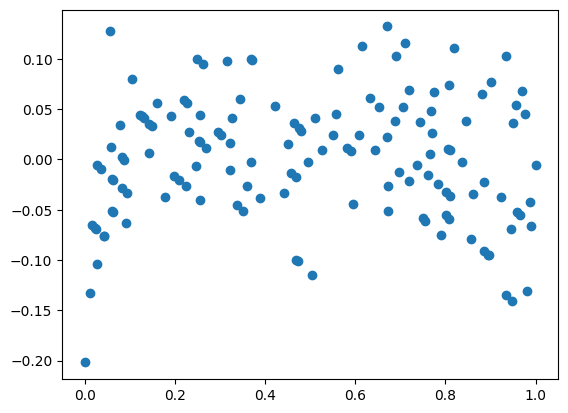

In [42]:
plt.scatter(X_train,res)
plt.show()

In [43]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr.predict(X_test_sm)

y_test_pred

,0
126,0.211813
104,0.536280
99,0.391227
92,0.507410
111,0.541209
167,0.492060
116,0.396860
96,0.479104
52,0.505579
69,0.506143


In [44]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test,y_test_pred)
r_squared

0.78763507515592

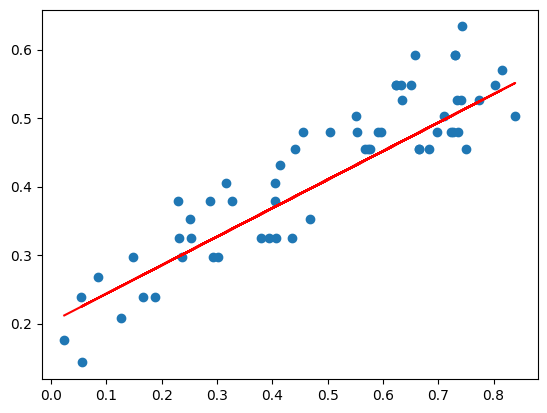

In [45]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X,y,train_size = 0.7, test_size=0.3,random_state=100)

In [47]:
X_train_lm.shape

(140,)

In [48]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

X_train_lm
X_test_lm

array([[0.02401082],
       [0.8031789 ],
       [0.45485289],
       [0.73385188],
       [0.81501522],
       [0.69699019],
       [0.46838011],
       [0.66587758],
       [0.72945553],
       [0.73080825],
       [0.39398039],
       [0.77375719],
       [0.18769023],
       [0.63273588],
       [0.29252621],
       [0.31619885],
       [0.50388908],
       [0.5732161 ],
       [0.550558  ],
       [0.37943862],
       [0.72370646],
       [0.43523842],
       [0.65843761],
       [0.59621238],
       [0.62292864],
       [0.74264457],
       [0.74095367],
       [0.25228272],
       [0.62292864],
       [0.41393304],
       [0.22894826],
       [0.23097734],
       [0.40683125],
       [0.63476496],
       [0.16672303],
       [0.40514034],
       [0.32634427],
       [0.56712885],
       [0.74974636],
       [0.65099763],
       [0.72607372],
       [0.59181603],
       [0.5539398 ],
       [0.73655732],
       [0.4041258 ],
       [0.30098072],
       [0.05478526],
       [0.839

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()
lm.fit(X_train_lm,y_train_lm)

LinearRegression()

In [51]:
print("Intercept :",lm.intercept_)
print("Slope :",lm.coef_)

Intercept : 0.2018138192528266
Slope : [0.41642757]


In [52]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8146390394959846
0.7876350751559198


Hence succesfull model of sales prediction using simple linear regression is executed.